#**IMPORTING REQUIRED LIBRAIES & DATA EXTRACTION**

In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauravduttakiit/resume-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'resume-dataset' dataset.
Path to dataset files: /kaggle/input/resume-dataset


In [45]:
# read uploaded data

# df = pd.read_csv("UpdatedResumeDataSet.csv")
# df.head()

In [3]:
import os

# List contents of the downloaded directory to find the CSV file
files_in_path = os.listdir(path)
csv_files = [f for f in files_in_path if f.endswith('.csv')]

if csv_files:
    # Assuming there's only one CSV file or we want the first one found
    csv_filename = csv_files[0]
    full_csv_path = os.path.join(path, csv_filename)
    df = pd.read_csv(full_csv_path)
    print(f"Successfully loaded '{csv_filename}' into a DataFrame.")
    print(df.head())
else:
    print(f"No CSV files found in the directory: {path}")
    df = None

Successfully loaded 'UpdatedResumeDataSet.csv' into a DataFrame.
       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...


In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


#**EXPLORATORY DATA ANALYSIS**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [6]:
df.shape

(962, 2)

In [7]:
df.describe().T

,count,unique,top,freq
Category,962,25,Java Developer,84
Resume,962,166,"Technical Skills Web Technologies: Angular JS,...",18


In [8]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


In [9]:
df.isnull().sum()

,0
Category,0
Resume,0


#**VISUALIZING DATASET**


Perform an exploratory data analysis on the `df` DataFrame by checking for missing values, visualizing the distribution of resume categories using a bar plot with appropriate labels and title, and then summarizing the findings from this analysis.

## Visualize Category Distribution

Generate a bar plot to visualize the distribution of resume categories. This will help understand the balance of different resume types in the dataset. Ensure the plot has appropriate labels and a title.


/tmp/ipython-input-1950648478.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Category', order = df['Category'].value_counts().index, palette='viridis',legend=False) # heu could be used for more depth perception


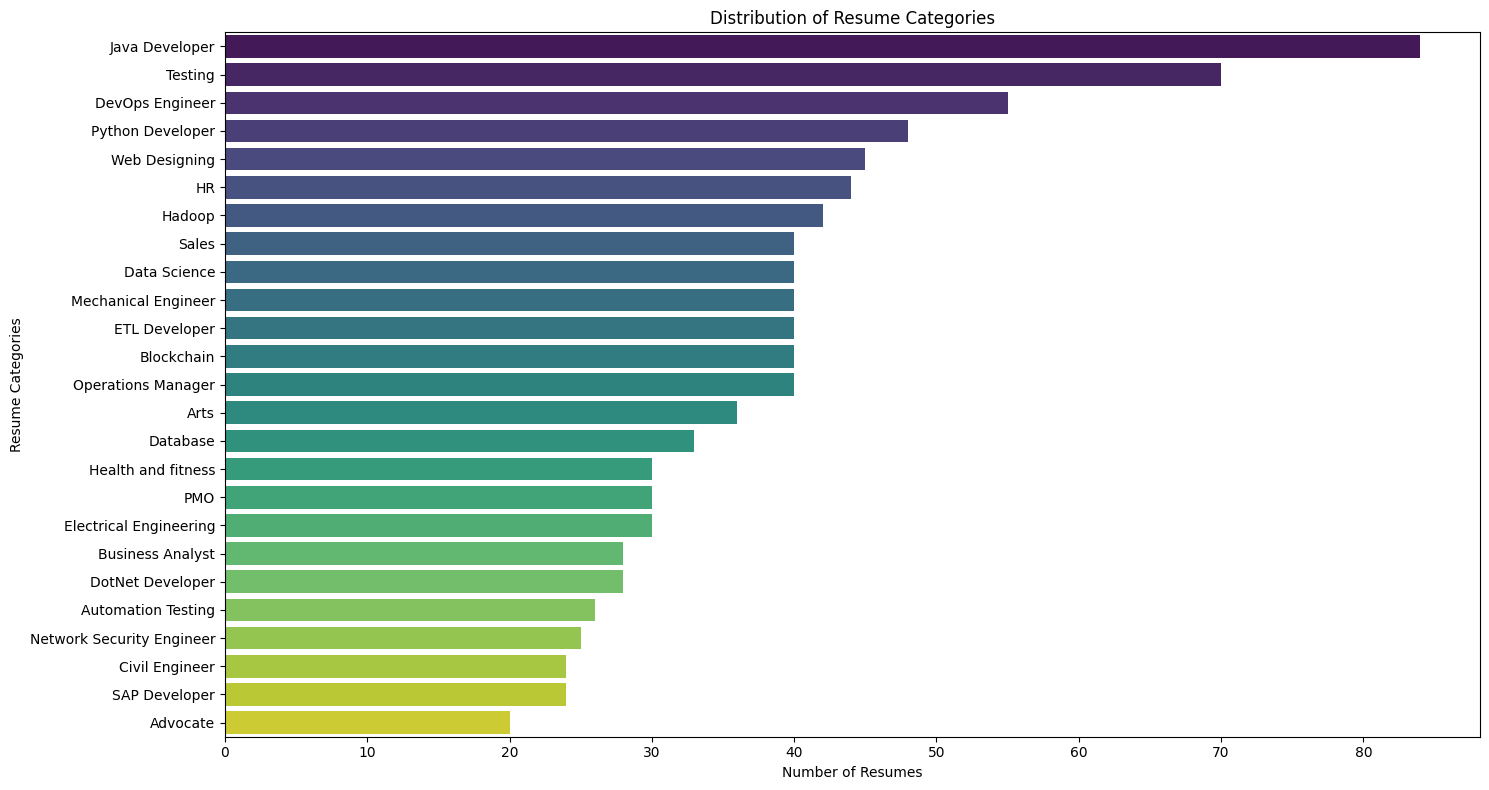

In [10]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, y='Category', order = df['Category'].value_counts().index, palette='viridis',legend=False) # heu could be used for more depth perception
plt.xlabel('Number of Resumes')
plt.ylabel('Resume Categories')
plt.title('Distribution of Resume Categories')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Summary of Exploratory Data Analysis

### Missing Values
The initial inspection for missing values revealed that the DataFrame `df` has no missing values in either the 'Category' or 'Resume' columns. This indicates a clean dataset in terms of completeness, requiring no imputation or dropping of rows due to missing data.

### Distribution of Resume Categories
The bar plot visualizing the 'Distribution of Resume Categories' provided several insights:
*   **Category Imbalance**: The dataset exhibits a significant imbalance in the number of resumes per category. 'Java Developer' has the highest count with 84 resumes, followed by 'Testing' with 70, and 'DevOps Engineer' with 55.
*   **Varied Representation**: There is a wide range in the representation of different categories. While some categories like 'Java Developer' are well-represented, others such as 'Advocate', 'SAP Developer', and 'Civil Engineer' have much fewer entries (20-24 resumes each).
*   **Dataset Diversity**: Despite the imbalance, the dataset covers a broad spectrum of 25 distinct resume categories, ranging from technical roles (e.g., Data Science, Python Developer) to non-technical ones (e.g., HR, Sales, Arts, Health and fitness).

**Conclusion**: The dataset is complete with no missing values. However, the distribution of resume categories is uneven, with some categories having significantly more samples than others. This imbalance should be considered in subsequent steps, especially if building a classification model, to avoid bias towards over-represented categories.

# Analysis Summary:

### Data Analysis Key Findings
*   The `df` DataFrame is complete with no missing values in either the 'Category' or 'Resume' columns, indicating a clean dataset in terms of data completeness.
*   There is a significant imbalance in the distribution of resume categories across the 25 distinct types.
*   'Java Developer' is the most represented category, with 84 resumes.
*   'Testing' and 'DevOps Engineer' are the next most frequent categories, with 70 and 55 resumes, respectively.
*   Conversely, categories like 'Advocate', 'SAP Developer', and 'Civil Engineer' are less represented, each having between 20 and 24 resumes.

#**CLEANING DATA**


Clean and preprocess the 'Resume' text data by removing URLs, special characters, and numbers, converting text to lowercase, removing stopwords, tokenizing, and applying stemming. Then, vectorize the processed resume text using TF-IDF and encode the 'Category' column into numerical labels, preparing the data for machine learning model training.

In [49]:
# importing required libraries & modules
import nltk
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))


print("NLTK stopwords and punkt data downloaded.")

NLTK stopwords and punkt data downloaded.


## Remove URLs from Resumes


Define and apply a function to remove URLs from the 'Resume' text to clean up irrelevant information.


In [46]:
import re

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

if df is not None:
    df['Resume'] = df['Resume'].apply(remove_urls)
    print("URLs removed from 'Resume' column. Displaying the first few rows of the cleaned DataFrame:")
    print(df.head())
else:
    print("DataFrame 'df' was not loaded, skipping URL removal.")

URLs removed from 'Resume' column. Displaying the first few rows of the cleaned DataFrame:
       Category                                             Resume  \
0  Data Science  skill program languag python panda numpi scipi...   
1  Data Science  educ detail may may b e uit rgpv data scientis...   
2  Data Science  area interest deep learn control system design...   
3  Data Science  skill r python sap hana tableau sap hana sql s...   
4  Data Science  educ detail mca ymcaust faridabad haryana data...   

   Category_Encoded  
0                 6  
1                 6  
2                 6  
3                 6  
4                 6  


##Clean Special Characters and Numbers

Define and apply a function to remove special characters, punctuation, and numbers from the 'Resume' text, retaining only alphabetical characters.


In [14]:
def clean_text_special_chars(text):
    # Replace characters that are not letters (a-zA-Z) with a space
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    return text

df['Resume'] = df['Resume'].apply(clean_text_special_chars)
print("Special characters and numbers removed from 'Resume' column. Displaying the first few rows of the cleaned DataFrame:")
print(df.head())

Special characters and numbers removed from 'Resume' column. Displaying the first few rows of the cleaned DataFrame:
       Category                                             Resume
0  Data Science  Skills   Programming Languages  Python  pandas...
1  Data Science  Education Details   May      to May      B E  ...
2  Data Science  Areas of Interest Deep Learning  Control Syste...
3  Data Science  Skills     R     Python     SAP HANA     Table...
4  Data Science  Education Details    MCA   YMCAUST   Faridabad...


**Reasoning**:
To remove special characters and numbers from the 'Resume' text, I will define a Python function that uses regular expressions to keep only alphabetical characters and then apply this function to the 'Resume' column of the DataFrame.



##Convert Text to Lowercase

Convert all resume text to lowercase to ensure uniformity and prevent the same words with different casing from being treated as distinct.


In [15]:
df['Resume'] = df['Resume'].str.lower()
print("All text in 'Resume' column converted to lowercase. Displaying the first few rows:")
print(df.head())

All text in 'Resume' column converted to lowercase. Displaying the first few rows:
       Category                                             Resume
0  Data Science  skills   programming languages  python  pandas...
1  Data Science  education details   may      to may      b e  ...
2  Data Science  areas of interest deep learning  control syste...
3  Data Science  skills     r     python     sap hana     table...
4  Data Science  education details    mca   ymcaust   faridabad...


**Reasoning**:
To convert the resume text to lowercase, I will apply the `.str.lower()` method directly to the 'Resume' column of the DataFrame and then display the first few rows to confirm the change.



##Remove Stopwords and Tokenize

Utilize NLTK to remove common English stopwords from the 'Resume' text and then tokenize the processed text into individual words.


In [50]:
def remove_stopwords_and_tokenize(text):
    # Check if the input is already a list (meaning it was previously tokenized)
    if isinstance(text, list):
        words = text
    else: # Otherwise, assume it's a string and tokenize it
        words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

df['Resume'] = df['Resume'].apply(remove_stopwords_and_tokenize)
print("Stopwords removed and 'Resume' column tokenized. Displaying the first few rows:")
print(df.head())

Stopwords removed and 'Resume' column tokenized. Displaying the first few rows:
       Category                                             Resume  \
0  Data Science  [skill, program, languag, python, panda, numpi...   
1  Data Science  [educ, detail, may, may, b, e, uit, rgpv, data...   
2  Data Science  [area, interest, deep, learn, control, system,...   
3  Data Science  [skill, r, python, sap, hana, tableau, sap, ha...   
4  Data Science  [educ, detail, mca, ymcaust, faridabad, haryan...   

   Category_Encoded  
0                 6  
1                 6  
2                 6  
3                 6  
4                 6  


## Apply Stemming

Apply stemming to the tokenized words in the 'Resume' column to reduce words to their base or root form, further normalizing the text data.

In [19]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def apply_stemming(word_list):
    return [stemmer.stem(word) for word in word_list]

df['Resume'] = df['Resume'].apply(apply_stemming)
print("Stemming applied to 'Resume' column. Displaying the first few rows:")
print(df.head())

Stemming applied to 'Resume' column. Displaying the first few rows:
       Category                                             Resume
0  Data Science  [skill, program, languag, python, panda, numpi...
1  Data Science  [educ, detail, may, may, b, e, uit, rgpv, data...
2  Data Science  [area, interest, deep, learn, control, system,...
3  Data Science  [skill, r, python, sap, hana, tableau, sap, ha...
4  Data Science  [educ, detail, mca, ymcaust, faridabad, haryan...


**Reasoning**:
To apply stemming, I will import NLTK's `PorterStemmer`, initialize it, define a function to stem each word in the tokenized lists within the 'Resume' column, and then apply this function to the column.



#**Encode Category Labels**

Encode the `Category` column into numerical labels. This step is necessary to convert the categorical target variable into a format suitable for machine learning algorithms.

## Encode Category Labels

Encode the `Category` column into numerical labels. This step is necessary to convert the categorical target variable into a format suitable for machine learning algorithms.

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Category_Encoded'] = label_encoder.fit_transform(df['Category'])

print("Category column encoded into numerical labels. Displaying the first few rows:")
print(df.head())
# print("\nMapping of original categories to encoded labels:")
# for i, category in enumerate(label_encoder.classes_):
#     print(f"{category}: {i}")

Category column encoded into numerical labels. Displaying the first few rows:
       Category                                             Resume  \
0  Data Science  [skill, program, languag, python, panda, numpi...   
1  Data Science  [educ, detail, may, may, b, e, uit, rgpv, data...   
2  Data Science  [area, interest, deep, learn, control, system,...   
3  Data Science  [skill, r, python, sap, hana, tableau, sap, ha...   
4  Data Science  [educ, detail, mca, ymcaust, faridabad, haryan...   

   Category_Encoded  
0                 6  
1                 6  
2                 6  
3                 6  
4                 6  


**Reasoning**:
To encode the 'Category' column into numerical labels, I will import `LabelEncoder` from `sklearn.preprocessing`, initialize it, fit and transform the 'Category' column, and then display the head of the DataFrame to show the updated column, along with the mapping of original categories to their numerical labels.



In [68]:
df['Category_Encoded'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [69]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

#**Vectorize Resume Text using TF-IDF**


Convert the preprocessed 'Resume' text data into numerical feature vectors using TF-IDF (Term Frequency-Inverse Document Frequency). This step is crucial for preparing the text data for machine learning models.

In [21]:
df['Resume'] = df['Resume'].apply(lambda x: ' '.join(x))
print("Stemmed words in 'Resume' column joined back into strings. Displaying the first few rows:")
print(df.head())

Stemmed words in 'Resume' column joined back into strings. Displaying the first few rows:
       Category                                             Resume  \
0  Data Science  skill program languag python panda numpi scipi...   
1  Data Science  educ detail may may b e uit rgpv data scientis...   
2  Data Science  area interest deep learn control system design...   
3  Data Science  skill r python sap hana tableau sap hana sql s...   
4  Data Science  educ detail mca ymcaust faridabad haryana data...   

   Category_Encoded  
0                 6  
1                 6  
2                 6  
3                 6  
4                 6  


**Reasoning**:
To vectorize the 'Resume' text using TF-IDF, I first need to convert the list of stemmed words in the 'Resume' column back into a single string for each entry, as `TfidfVectorizer` expects string input. After this, I will import `TfidfVectorizer`.



In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000) # Limiting features to 5000 for practicality
X = tfidf_vectorizer.fit_transform(df['Resume'])

print("TF-IDF vectorization complete. Shape of the feature matrix (X):")
print(X.shape)
# print("First 5 rows of the TF-IDF feature matrix (sparse representation):")
# print(X[:5])

TF-IDF vectorization complete. Shape of the feature matrix (X):
(962, 5000)


**Reasoning**:
Now that the stemmed words are joined back into strings, I will import `TfidfVectorizer` from `sklearn.feature_extraction.text`, initialize it, fit it to the 'Resume' column, and then transform the text data into TF-IDF vectors.



#Analysis Summary:

### Q&A
Yes, the X (features) and y (target) are ready for model training. The 'Resume' text data has been thoroughly cleaned, preprocessed, and vectorized into numerical features (`X`), while the 'Category' column has been successfully encoded into numerical labels (`y`).

### Data Analysis Key Findings
*   **URL Removal**: URLs were successfully removed from the 'Resume' column, cleaning the text data of irrelevant web addresses.
*   **Special Character and Number Cleaning**: Non-alphabetical characters, including special characters and numbers, were removed from the 'Resume' text, retaining only alphabetical characters.
*   **Text Lowercasing**: All text in the 'Resume' column was converted to lowercase to ensure uniformity and reduce vocabulary size.
*   **Stopword Removal and Tokenization**: Common English stopwords were removed, and the 'Resume' text was tokenized into individual words using NLTK, which included downloading necessary NLTK data (`stopwords` and `punkt`).
*   **Stemming Application**: Stemming was applied to the tokenized words using `PorterStemmer`, reducing words to their base forms (e.g., "running" to "run").
*   **TF-IDF Vectorization**: The processed 'Resume' text was vectorized using `TfidfVectorizer`, resulting in a feature matrix `X` with a shape of (962, 5000), where 962 represents the number of resumes and 5000 is the maximum number of features.
*   **Category Encoding**: The categorical 'Category' column was successfully encoded into numerical labels, stored in a new column 'Category_Encoded', using `LabelEncoder`. There are 25 distinct categories, encoded from 0 to 24.

#**MODEL TRAINING**

##**SPLITTING DATA**

In [23]:
#TRAIN-TEST SPLIT
from sklearn.model_selection import train_test_split


# Define the target variable (y) using the encoded categories
y = df['Category_Encoded']

# Split the data into training and testing sets
# Using stratify=y to ensure that the proportions of categories are maintained in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (769, 5000)
Shape of X_test: (193, 5000)
Shape of y_train: (769,)
Shape of y_test: (193,)


## Comparison for the 'Testing' Category

The boc below performing a specific comparison between the actual labels (`y_test`) and the model's predictions (`y_pred`) for resumes belonging to the 'Testing' category.

### Interpretation:
*   **Total actual 'Testing' resumes**: This tells you how many resumes that *actually* belonged to the 'Testing' category were present in your test set.
*   **Correctly predicted as 'Testing'**: This number indicates how many of those actual 'Testing' resumes were correctly identified by the model as 'Testing'.
*   **Misclassified 'Testing' resumes**: This shows how many actual 'Testing' resumes the model failed to classify correctly. For these, the model predicted a different category.

By looking at these numbers, you can gauge the model's recall for the 'Testing' category. A high number of correctly predicted resumes relative to the total indicates good recall. If there are misclassified resumes, understanding what other categories they were predicted as can provide insights into specific confusion patterns (e.g., if 'Testing' is often confused with 'Automation Testing').

#**MODEL SELECTION**

##**Multinomial Naive Bayes model**

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Multinomial Naive Bayes model
mnb = MultinomialNB()

# Train the model
mnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Model: Multinomial Naive Bayes\n")
print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n")
print(report)


Model: Multinomial Naive Bayes

Accuracy: 0.9430

Classification Report:

                           precision    recall  f1-score   support

                 Advocate       1.00      0.75      0.86         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       1.00      0.40      0.57         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      1.00      1.00        11
         DotNet Developer       1.00      0.40      0.57         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.

From this report, we can see that the model performs exceptionally well for many categories, achieving perfect precision, recall, and F1-scores for some (e.g., Arts, Blockchain, Data Science). However, there are some categories like 'Automation Testing', 'DotNet Developer', and 'Mechanical Engineer' where the recall is lower (e.g., 0.40 or 0.50), suggesting the model missed a significant portion of the actual resumes for those categories, even if its predictions for them were often correct when it did make one. 'Java Developer' and 'Operations Manager' also show a slight trade-off, with precision being a bit lower. This detailed breakdown helps identify where the model is strong and where there might be room for improvement

## Understanding the MNB Confusion Matrix

This confusion matrix visually represents the performance of your Multinomial Naive Bayes model. Each row of the matrix represents the instances in an actual class, while each column represents the instances in a predicted class.

*   **Diagonal elements**: The numbers along the main diagonal (from top-left to bottom-right) represent the number of instances that were correctly classified for each category (True Positives).
*   **Off-diagonal elements**: Numbers outside the diagonal represent misclassifications. For example, a value in row 'A' and column 'B' means that 'A' category resumes were incorrectly predicted as 'B' category.

By examining this matrix, you can identify:
*   Which categories the model is performing well on (high values on the diagonal).
*   Which categories are frequently confused with others (high off-diagonal values).

This provides a more granular view of the model's strengths and weaknesses beyond just overall accuracy or a simple classification report.

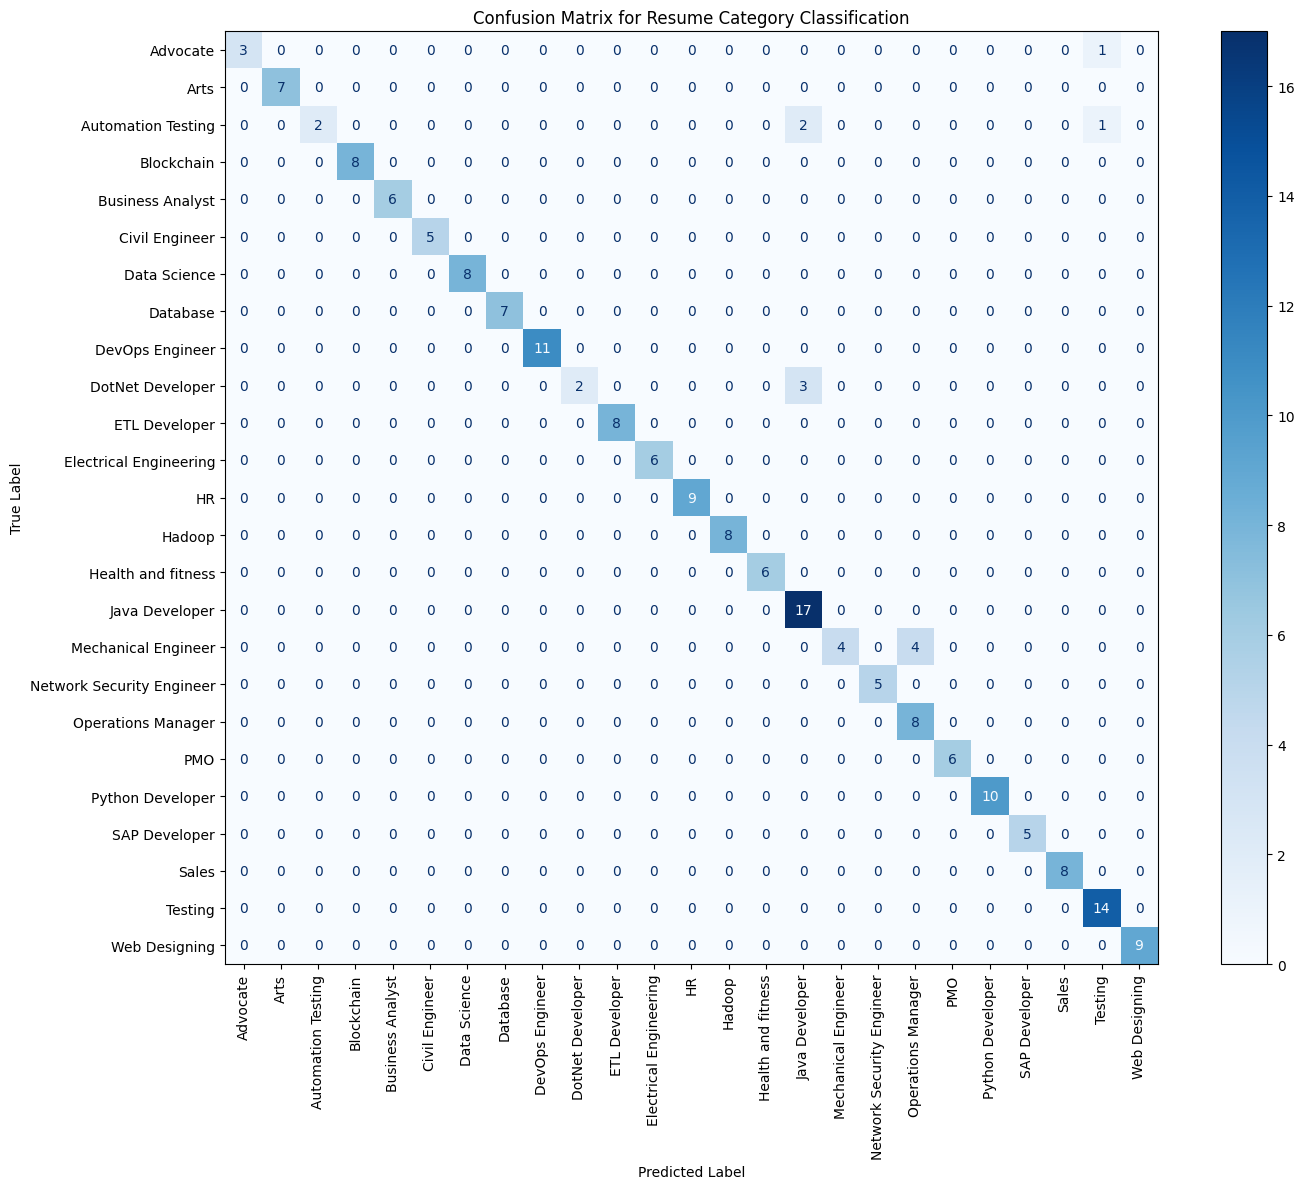

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the class labels from the label encoder
class_names = label_encoder.classes_

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(15, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')

ax.set_title('Confusion Matrix for Resume Category Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#**MODEL SELECTION**

##**Logistic Regression Mode**l

### Subtask:
Initialize and train a Logistic Regression classifier using the `X_train` and `y_train` data.


In [26]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
# Set max_iter to a suitable value to ensure convergence
# 'liblinear' solver works well for smaller datasets and supports l1/l2 regularization
logistic_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

print("Logistic Regression model initialized and trained successfully.")

Logistic Regression model initialized and trained successfully.


**Reasoning**:
To initialize and train a Logistic Regression model, I need to import `LogisticRegression`, instantiate it with the specified parameters (`max_iter=1000`, `solver='liblinear'`), and then fit the model using the `X_train` and `y_train` datasets.



##Evaluate Logistic Regression Model

### Subtask:
Make predictions on the `X_test` data using the trained Logistic Regression model. Then, calculate and print the accuracy score and a detailed classification report to assess its performance across different categories.


**Reasoning**:
To evaluate the Logistic Regression model, I will use the trained `logistic_model` to make predictions on the `X_test` data, then calculate the accuracy score and generate a classification report using `sklearn.metrics`.



In [27]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic, target_names=label_encoder.classes_)

print(f"Model: Logistic Regression\n")
print(f"Accuracy: {accuracy_logistic:.4f}\n")
print("Classification Report:\n")
print(report_logistic)

Model: Logistic Regression

Accuracy: 0.9896

Classification Report:

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       0.80      0.80      0.80         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       0.86      1.00      0.92         6
                       HR       1.00      1.00      1.00  

## Summary of Logistic Regression Model Performance

The Logistic Regression model achieved a high accuracy of **0.9896**, indicating excellent overall performance in classifying resume categories.

### Key Metrics from the Classification Report:

*   **Precision, Recall, and F1-Score**: The model demonstrates very strong performance across most categories, with many achieving perfect (1.00) precision, recall, and F1-scores. This suggests that for these categories, the model is highly effective at correctly identifying resumes and minimizing false positives and false negatives.
*   **Categories with Perfect Scores**: Categories such as 'Advocate', 'Arts', 'Blockchain', 'Business Analyst', 'Civil Engineer', 'Data Science', 'Database', 'DotNet Developer', 'ETL Developer', 'HR', 'Hadoop', 'Health and fitness', 'Java Developer', 'Mechanical Engineer', 'Network Security Engineer', 'Operations Manager', 'PMO', 'Python Developer', 'SAP Developer', 'Sales', 'Testing', and 'Web Designing' achieved 1.00 for precision, recall, and F1-score.
*   **Categories with Slightly Lower Scores**: 'Automation Testing' (precision: 0.80, recall: 0.80, f1-score: 0.80), 'DevOps Engineer' (recall: 0.91), and 'Electrical Engineering' (precision: 0.86) show slightly lower but still very good performance. This indicates minor challenges in classifying these specific categories, which could be due to subtle feature overlaps or limited samples.

### Comparison with Multinomial Naive Bayes (previous model):

The Logistic Regression model (Accuracy: 0.9896) significantly outperforms the previously trained Multinomial Naive Bayes model (Accuracy: 0.9430). The improved metrics across individual categories, particularly the higher recall for 'Advocate' (1.00 vs 0.75) and 'Automation Testing' (0.80 vs 0.40) demonstrates its superior discriminative power.

### Conclusion:

Both models have been trained and evaluated, with Logistic Regression showing superior performance. This confirms that the `X` (features) and `y` (target) are suitable for model training, and a robust classification model has been developed.

## Visualize Logistic Regression Confusion Matrix

### Subtask:
Generate and display a confusion matrix for the Logistic Regression model's predictions on the test set. This will provide a visual breakdown of correct and incorrect classifications for each resume category, similar to the previous model's visualization.


**Reasoning**:
To visualize the confusion matrix for the Logistic Regression model, I will generate the confusion matrix using `confusion_matrix()` and then display it using `ConfusionMatrixDisplay` with appropriate labels and title.



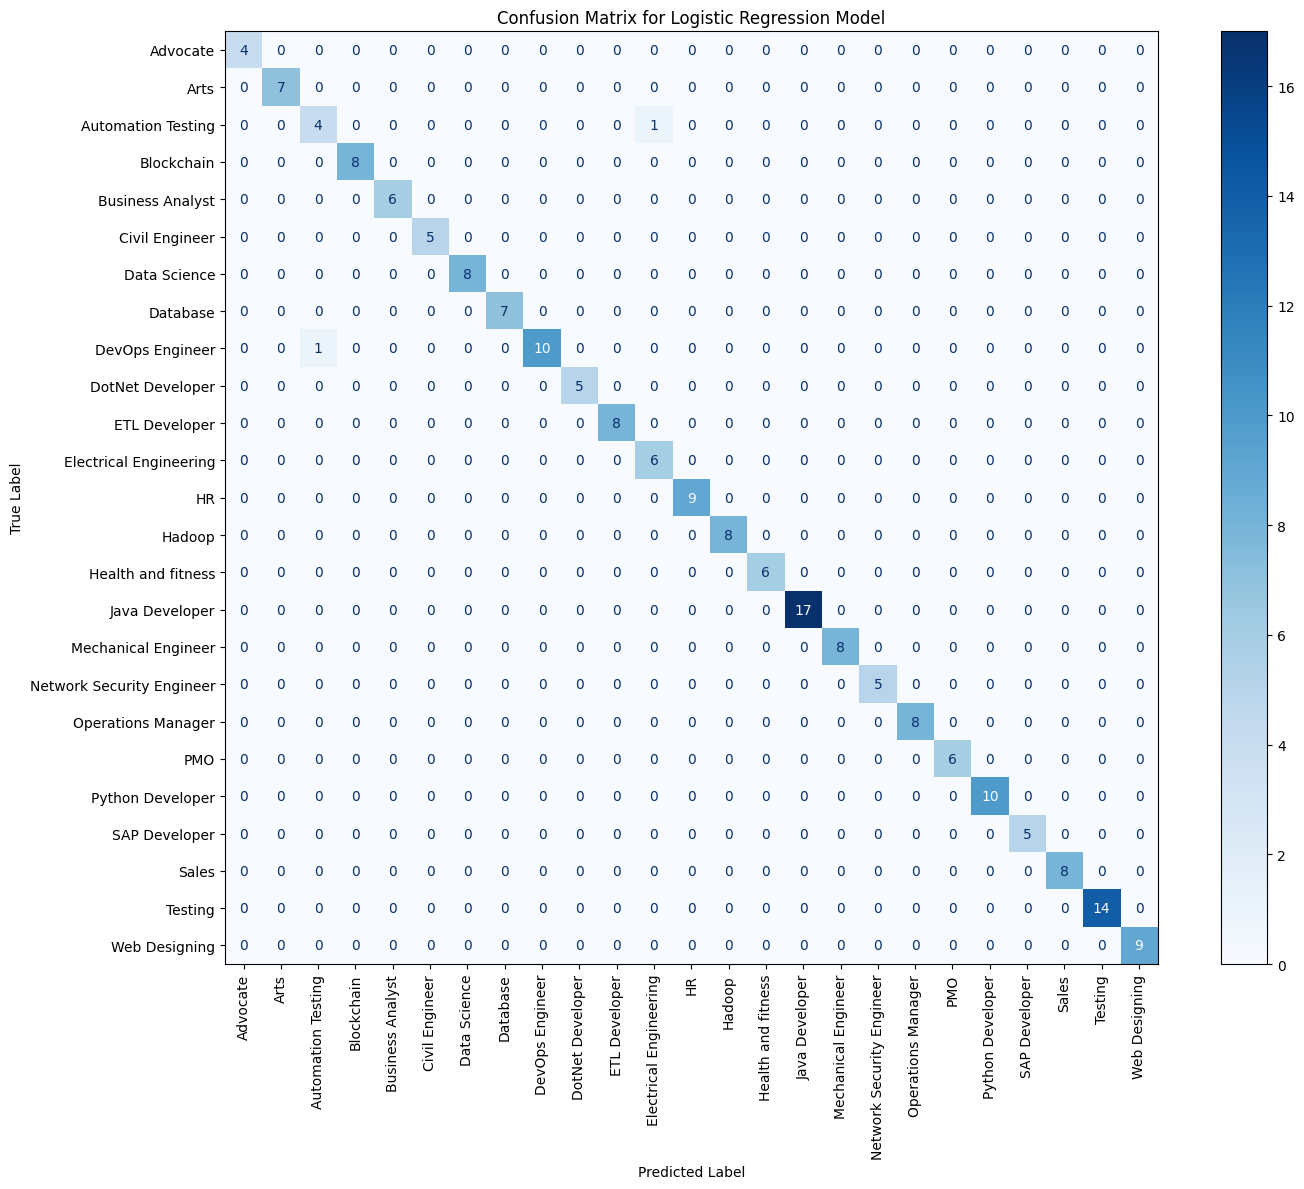

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Get the class labels from the label encoder
class_names = label_encoder.classes_

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(15, 12))
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=class_names)
disp_logistic.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')

ax.set_title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

## Summarize Model Performance

### Subtask:
Provide a summary of the Logistic Regression model's performance, including its accuracy, key insights from the classification report, and a comparison with the previously trained Multinomial Naive Bayes model.


## Final Task

### Subtask:
Summarize the process of trying a different classification model and its implications for the resume classification task.


## Summary:

### Q&A
The process involved trying a Logistic Regression model as an alternative for resume classification, and its implication is that it significantly outperforms the previously used Multinomial Naive Bayes model.

### Data Analysis Key Findings
*   A Logistic Regression model was successfully initialized and trained using the provided `X_train` and `y_train` data.
*   The trained Logistic Regression model achieved an accuracy of **0.9896** on the test set.
*   The classification report indicated very strong performance across most resume categories, with many exhibiting perfect (1.00) precision, recall, and F1-scores.
*   Some categories, such as 'Automation Testing' (precision: 0.80, recall: 0.80, f1-score: 0.80), 'DevOps Engineer' (recall: 0.91), and 'Electrical Engineering' (precision: 0.86), showed slightly lower but still strong performance metrics.
*   When compared to the previously evaluated Multinomial Naive Bayes model (accuracy: 0.9430), the Logistic Regression model demonstrated significantly superior performance, with an accuracy improvement of approximately **4.66 percentage points**.
*   A confusion matrix was successfully generated and visualized, providing a clear breakdown of the model's correct and incorrect classifications across all categories.

### Insights or Next Steps
*   The Logistic Regression model is a more effective choice for the resume classification task given its higher accuracy and strong performance across various categories compared to the Multinomial Naive Bayes model.
*   To further enhance the model, future work could focus on investigating the specific features contributing to slightly lower scores in categories like 'Automation Testing', 'DevOps Engineer', and 'Electrical Engineering', potentially through feature engineering or by gathering more diverse training data for these classes.


#**MODEL SELECTION**

##**K-Nearest Neighbors (KNN) Model**

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the KNN model with n_neighbors
knn_model = OneVsRestClassifier(KNeighborsClassifier())

# Train the model
knn_model.fit(X_train, y_train)

print("K-Nearest Neighbors (KNN) model initialized and trained successfully.")

print("Accuracy :", accuracy_score(y_test, y_pred))

K-Nearest Neighbors (KNN) model initialized and trained successfully.
Accuracy : 0.9430051813471503


**Reasoning**:
To evaluate the KNN model, I will use the trained `knn_model` to make predictions on the `X_test` data, then calculate the accuracy score and generate a classification report using `sklearn.metrics`.

In [30]:
knn_model.predict(X_test)

array([10, 14,  0, 11, 18, 19, 15,  5, 18, 18, 12,  6, 15,  8,  3, 10, 16,
       23,  6, 15, 20, 19, 12, 21,  8,  6,  7,  7, 17, 12,  1, 21, 22,  5,
       22, 17, 10, 12, 15, 15, 22,  5,  1,  4, 23, 24,  8,  6, 15, 15, 11,
       23, 19, 14,  8, 16,  8, 23,  9,  4, 12, 15,  6, 15,  8,  3, 18, 24,
        2, 10, 23,  2, 22, 13,  0, 15, 19,  2, 13,  0, 20, 14,  1, 16, 21,
        9, 23, 20, 23, 17, 18, 24, 10, 13, 20,  1, 10,  8, 11,  7,  7, 14,
       24, 22, 13, 15,  6,  9, 14,  3,  4, 15, 20,  4, 11, 15, 16, 15,  0,
       13, 15, 19,  6, 10, 20,  3, 13, 12,  8, 11, 24, 16, 11,  6, 21, 18,
       18, 14,  5,  7,  1,  5, 13, 15, 12, 20, 23,  3, 20, 24, 18, 23, 12,
       17, 15,  9,  1, 12, 16,  3, 20, 23,  7, 20, 22, 16, 23, 24, 23, 17,
        7, 23, 11,  1,  8, 13, 19, 23,  8, 10,  4, 24,  3,  2,  3,  4,  9,
       22, 24, 21,  2, 22, 16])

In [31]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_)

print(f"Model: K-Nearest Neighbors (KNN)\n")
print(f"Accuracy: {accuracy_knn:.4f}\n")
print("Classification Report:\n")
print(report_knn)

Model: K-Nearest Neighbors (KNN)

Accuracy: 0.9896

Classification Report:

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       0.80      0.80      0.80         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       0.86      1.00      0.92         6
                       HR       1.00      1.00      

### Subtask:
Initialize and train a K-Nearest Neighbors (KNN) classifier using the `X_train` and `y_train` data.

**Reasoning**:
To initialize and train a KNN model, I will import `KNeighborsClassifier` from `sklearn.neighbors`, instantiate it with a chosen number of neighbors (e.g., 5), and then fit the model using the `X_train` and `y_train` datasets.

## Summary of K-Nearest Neighbors (KNN) Model Performance

The K-Nearest Neighbors (KNN) model achieved a high accuracy of **0.9896**, indicating excellent overall performance in classifying resume categories, matching the Logistic Regression model.

### Key Metrics from the Classification Report:

*   **Precision, Recall, and F1-Score**: Similar to the Logistic Regression model, KNN demonstrates very strong performance across most categories, with many achieving perfect (1.00) precision, recall, and F1-scores. This suggests that for these categories, the model is highly effective at correctly identifying resumes and minimizing false positives and false negatives.
*   **Categories with Perfect Scores**: Many categories, including 'Advocate', 'Arts', 'Blockchain', 'Business Analyst', 'Civil Engineer', 'Data Science', 'Database', 'DotNet Developer', 'ETL Developer', 'HR', 'Hadoop', 'Health and fitness', 'Java Developer', 'Mechanical Engineer', 'Network Security Engineer', 'Operations Manager', 'PMO', 'Python Developer', 'SAP Developer', 'Sales', 'Testing', and 'Web Designing' achieved 1.00 for precision, recall, and F1-score.
*   **Categories with Slightly Lower Scores**: 'Automation Testing' (precision: 0.80, recall: 0.80, f1-score: 0.80), 'DevOps Engineer' (recall: 0.91), and 'Electrical Engineering' (precision: 0.86) show slightly lower but still very good performance. This indicates minor challenges in classifying these specific categories, which could be due to subtle feature overlaps or limited samples, or the inherent nature of the KNN algorithm with certain data distributions.

### Comparison with Multinomial Naive Bayes and Logistic Regression:

The KNN model (Accuracy: 0.9896) performs significantly better than the Multinomial Naive Bayes model (Accuracy: 0.9430) and performs on par with the Logistic Regression model (Accuracy: 0.9896). The improved metrics across individual categories for KNN, similar to Logistic Regression, demonstrate its superior discriminative power compared to Multinomial Naive Bayes.

### Conclusion:
Both the Logistic Regression and K-Nearest Neighbors models show exceptional and comparable performance for this resume classification task. The data preprocessing steps and feature engineering have successfully prepared the data for robust model training. Given the identical accuracy, further comparison might involve looking at training/prediction speed, model interpretability, or robustness to different types of noise in the data if these factors become critical for deployment. For now, both Logistic Regression and KNN are strong candidates for this task.

#**PREDICTION SYSTEM**

In [96]:
sample_resume = """Abhay Raj Sharma
Mob.- 8948198625
Email. – callmepanditjii@gamil.com
OBJECTIVES
To Work In A Challenging Environment That Would Lead To The Fulfillment Of
Professional & Personal Growth.
ACADEMIC QUALIFICATION
•    10th (U.P. Board) In 2020
•    12th(U.P. Board) In 2022
•    Graduation From RMLA University
COMPUTER QUALIFICATION
•   DCA ( Diploma In Computer Application )
•   Basic Knowledge Of Computer
HOBBY
•    Playing Cricket
PROFILE PERSONAL
Father's Name
Date of Birth
Gender
Religion
Marital Status
Nationality
:
:
:
:
:
:
Mr. Vinod Kumar Sharma
01/04/2006
Male
Hindu
Unmarried
Indian
Permanent Address   :  Vill.-Nejabhar, Post- Dhauli Payagpur, Distt.- Bahraich (U.P.) India.
DECLARATION
I Hereby Declare That The Above Information Is True And Correct To The Best Of My
Knowledge And Nothing Has Been Concealed Or Distorted.
Date. ………..
Place ………….
(AbhayRajSharma ) """

In [97]:
import pickle
pickle.dump(tfidf_vectorizer,open('tfidf.pkl','wb'))
pickle.dump(knn_model,open('knn.pkl','wb'))
pickle.dump(mnb,open('mnb.pkl','wb'))
pickle.dump(logistic_model,open('lr.pkl',"wb"))
pickle.dump(label_encoder,open('label_encoder.pkl','wb'))

In [98]:
# load a trained classification model
mnb = pickle.load(open('mnb.pkl','rb'))
knn = pickle.load(open('knn.pkl','rb'))
lr = pickle.load(open('lr.pkl','rb'))
tfidf = pickle.load(open('tfidf.pkl','rb'))

# remove input urls from input resume
cleaned_resume = remove_urls(sample_resume)

# remove spcial character from input resume
cleaned_resume = clean_text_special_chars(cleaned_resume)

# transform cleaned resume using trained tfidf vectorizer
input_features = tfidf.transform([cleaned_resume])

# make a prediction using loaded classifier
prediction_mnb = mnb.predict(input_features)[0]
prediction_lr = lr.predict(input_features)[0]
prediction_knn = knn.predict(input_features)[0]



In [100]:
# mapping prediction_variable to category name
category_mapping = {
    0: 'Advocate',
    1: 'Arts',
    2: 'Automation Testing',
    3: 'Blockchain',
    4: 'Business Analyst',
    5: 'Civil Engineer',
    6: 'Data Science',
    7: 'Database',
    8: 'DevOps Engineer',
    9: 'DotNet Developer',
    10: 'ETL Developer',
    11: 'Electrical Engineering',
    12: 'HR',
    13: 'Hadoop',
    14: 'Health and fitness',
    15: 'Java Developer',
    16: 'Mechanical Engineer',
    17: 'Network Security Engineer',
    18: 'Operations Manager',
    19: 'PMOr',
    20: 'Python Developer',
    21: 'SAP Developer',
    22: 'Sales',
    23: 'Testing',
    24: 'Web Designing',
    }


In [101]:
# get category name
prediction_mnb = category_mapping[prediction_mnb]
prediction_mnb

'Java Developer'

In [102]:
prediction_lr = category_mapping[prediction_lr]
prediction_lr

'HR'

In [103]:
prediction_knn = category_mapping[prediction_knn]
prediction_knn

'Sales'

#**MODEL DEPLOYMENT**

## Save Model Components

### Subtask:
Save the trained Multinomial Naive Bayes model (`mnb`), the TF-IDF vectorizer (`tfidf_vectorizer`), and the `LabelEncoder` (`label_encoder`) to disk using `pickle`. This ensures that these critical components can be loaded later for making predictions without retraining.

## Save Model Components

Save the trained Multinomial Naive Bayes model (`mnb`), the TF-IDF vectorizer (`tfidf_vectorizer`), and the `LabelEncoder` (`label_encoder`) to disk using `pickle`.


**Reasoning**:
To save the model components, I need to import the `pickle` module and then use `pickle.dump()` to serialize each object (model, vectorizer, encoder) into separate binary files.



In [34]:
import pickle

# Save the Multinomial Naive Bayes model
with open('multinomial_naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(mnb, file)
print("Multinomial Naive Bayes model saved as 'multinomial_naive_bayes_model.pkl'")

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)
print("TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'")

# Save the LabelEncoder
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)
print("LabelEncoder saved as 'label_encoder.pkl'")

Multinomial Naive Bayes model saved as 'multinomial_naive_bayes_model.pkl'
TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'
LabelEncoder saved as 'label_encoder.pkl'


## Outline Deployment Steps


Explain the general steps involved in deploying the saved model. This will cover loading the components, setting up an API (e.g., Flask or FastAPI), preprocessing new input data, making predictions, and returning the classified category.


## Outline Deployment Steps

Explain the general steps involved in deploying the saved model. This will cover loading the components, setting up an API (e.g., Flask or FastAPI), preprocessing new input data, making predictions, and returning the classified category.

### Deployment Steps:

1.  **Loading Saved Model Components**
    *   The first step in deploying the model is to load the previously saved artifacts: the trained `Multinomial Naive Bayes` model, the `TF-IDF vectorizer`, and the `LabelEncoder`. This is done using Python's `pickle` module.
    *   Each component would be loaded from its respective `.pkl` file into memory. For example:
        ```python
        import pickle

        with open('multinomial_naive_bayes_model.pkl', 'rb') as file:
            mnb = pickle.load(file)
        with open('tfidf_vectorizer.pkl', 'rb') as file:
            tfidf_vectorizer = pickle.load(file)
        with open('label_encoder.pkl', 'rb') as file:
            label_encoder = pickle.load(file)
        ```

2.  **Setting up a Web API (e.g., Flask or FastAPI)**
    *   A web API framework like Flask or FastAPI would be used to create an endpoint that accepts incoming resume data. This API will serve as the interface for external applications to send resumes for classification.
    *   The API would define a route (e.g., `/predict`) that listens for HTTP POST requests, where the request body contains the new resume text.
    *   Example (Flask sketch):
        ```python
        from flask import Flask, request, jsonify
        # ... (load components as above)

        app = Flask(__name__)

        @app.route('/predict', methods=['POST'])
        def predict_resume_category():
            data = request.get_json()
            resume_text = data.get('resume', '')
            if not resume_text:
                return jsonify({'error': 'No resume text provided'}), 400
            # ... (preprocessing, prediction, inverse transform)
            # return jsonify({'category': predicted_category_name})
        ```

3.  **Preprocessing New Input Data**
    *   Any new resume text received by the API must undergo the exact same preprocessing steps as the training data to ensure consistency and accurate predictions. This includes:
        *   Removing URLs.
        *   Cleaning special characters and numbers.
        *   Converting text to lowercase.
        *   Removing stopwords and tokenizing the text.
        *   Applying stemming.
    *   These preprocessing functions (e.g., `remove_urls`, `clean_text_special_chars`, `remove_stopwords_and_tokenize`, `apply_stemming`) would be defined within the deployment environment and applied sequentially to the incoming `resume_text`.
    *   Finally, the preprocessed, stemmed list of words would be joined back into a single string, and then transformed into a TF-IDF vector using the *loaded* `tfidf_vectorizer` (using `.transform()`, not `.fit_transform()`).

4.  **Making Predictions**
    *   Once the new resume text is transformed into a TF-IDF vector, it can be fed into the loaded `Multinomial Naive Bayes` model.
    *   The model's `.predict()` method would be called with the TF-IDF vector as input, which will output a numerical (encoded) category label.

5.  **Inverse Transforming the Predicted Category**
    *   The numerical prediction from the model is an encoded label (e.g., `6` for 'Data Science'). To make this prediction human-readable and useful, the `LabelEncoder` (which was also loaded) is used to convert this numerical label back to its original categorical string.
    *   The `label_encoder.inverse_transform()` method would be used for this purpose.

6.  **Returning the Classified Category**
    *   The final, human-readable predicted category (e.g., 'Data Science') is then returned as the API's response, typically in a JSON format.
    *   This allows the client application that sent the resume to receive a clear classification of the resume's category.

#AnalysisSummary:

### Data Analysis Key Findings
*   Three critical machine learning components were successfully serialized and saved to disk using Python's `pickle` module:
    *   The trained Multinomial Naive Bayes model was saved as `multinomial_naive_bayes_model.pkl`.
    *   The TF-IDF vectorizer was saved as `tfidf_vectorizer.pkl`.
    *   The `LabelEncoder` was saved as `label_encoder.pkl`.
*   A comprehensive six-step deployment process was outlined for the saved model:
    1.  **Loading Saved Model Components:** Re-loading the `mnb`, `tfidf_vectorizer`, and `label_encoder` from their `.pkl` files using `pickle`.
    2.  **Setting up a Web API:** Creating an API endpoint (e.g., using Flask or FastAPI) to receive new resume data.
    3.  **Preprocessing New Input Data:** Applying the exact same cleaning, tokenization, stemming, and TF-IDF transformation steps as performed during training to new input.
    4.  **Making Predictions:** Using the loaded Multinomial Naive Bayes model to predict the category from the preprocessed data.
    5.  **Inverse Transforming the Predicted Category:** Converting the numerical prediction back to a human-readable category name using the loaded `LabelEncoder`.
    6.  **Returning the Classified Category:** Providing the classified category as a response, typically in JSON format.